In [284]:
import pandas as pd 
import numpy as np
from preprocessing import Data
from kmeans import KMeans

In [285]:
# 获得每个任务的标价
price = pd.read_csv('Appendix1.csv')
price = price['任务标价']
price = price[:835]
price

0      66.0
1      65.5
2      65.5
3      75.0
4      65.5
       ... 
830    65.5
831    72.0
832    85.0
833    65.5
834    85.0
Name: 任务标价, Length: 835, dtype: float64

In [286]:
# 数据预处理
data = Data()
data.load_data_csv()
data.df

,纬度,经度,cluster
0,22.566142,113.980837,None
1,22.686205,113.940525,None
2,22.576512,113.957198,None
3,22.564841,114.244571,None
4,22.558888,113.950723,None
...,...,...,...
830,23.044062,113.125784,None
831,22.833262,113.280152,None
832,22.814676,113.827731,None
833,23.063674,113.771188,None


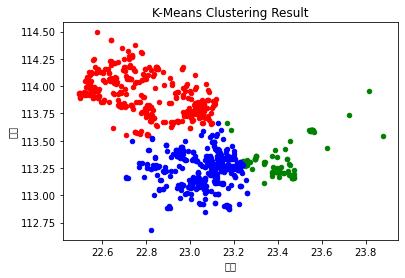

In [287]:
# 聚类
kmeans_obj = KMeans(data=data,k=3)
kmeans_obj.kmeans_main()
kmeans_obj.show_res_tmp()

In [288]:
kmeans_obj.data.df

,纬度,经度,cluster
0,22.566142,113.980837,0
1,22.686205,113.940525,0
2,22.576512,113.957198,0
3,22.564841,114.244571,0
4,22.558888,113.950723,0
...,...,...,...
830,23.044062,113.125784,2
831,22.833262,113.280152,2
832,22.814676,113.827731,0
833,23.063674,113.771188,0


In [289]:
# 聚类中心点
center = kmeans_obj.cluster_avg
center

[[22.7902, 113.9245], [23.4199, 113.3411], [23.0592, 113.2372]]

In [290]:
from haversine import haversine

In [291]:
# 计算每个点到该簇聚类中心的距离
distance = np.zeros_like(price)
inf = float('inf')
for idx in range(data.df.shape[0]):
    lat1,lon1 = data.df.iloc[idx,0],data.df.iloc[idx,1]
    cluster_flag = kmeans_obj.data.df.iloc[idx,2] 
    lat2,lon2 = center[cluster_flag][0],center[cluster_flag][1]
    distance[idx] = haversine((lat1,lon1),(lat2,lon2))

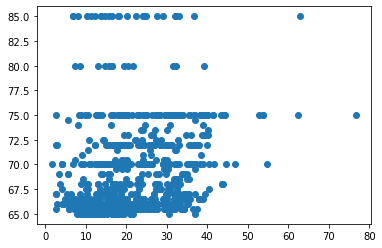

In [292]:
# 画出距离-标价散点图
import matplotlib.pyplot as plt 
plt.scatter(distance,price)
plt.show()

In [315]:
# 读取附件2
appendix_2 = pd.read_csv('Appendix2.csv')
appendix_2 = appendix_2.iloc[:-1,[1,2,3,4]]
credit = appendix_2['信誉值']
# 对信誉度 取对数 便于计算
credit = np.log(credit)
credit = credit + abs(np.min(credit))
credit

0       20.337565
1       19.753747
2       19.448621
3       19.340394
4       19.158757
          ...    
1872     4.820282
1873     4.795791
1874     4.127134
1875     3.583519
1876     0.000000
Name: 信誉值, Length: 1877, dtype: float64

In [316]:
appendix_2

,会员位置(GPS),预订任务限额,预订任务开始时间,信誉值
0,22.947097 113.679983,114.0,6:30:00,67997.3868
1,22.577792 113.966524,163.0,6:30:00,37926.5416
2,23.192458 113.347272,139.0,6:30:00,27953.0363
3,23.255965 113.31875,98.0,6:30:00,25085.6986
4,33.65205 116.97047,66.0,6:30:00,20919.0667
...,...,...,...,...
1872,22.840505 113.277245,1.0,8:00:00,0.0124
1873,23.069415 113.287606,1.0,8:00:00,0.0121
1874,23.333446 113.301736,1.0,8:00:00,0.0062
1875,22.693506 113.994101,1.0,8:00:00,0.0036


In [317]:
# 计算每个会员的完成概率
done_prob = np.zeros_like(credit)
for i in range(len(credit)):  
    done_prob[i] = credit[i]/credit[0]
appendix_2.insert(3,'完成概率',done_prob)

In [318]:
appendix_2

,会员位置(GPS),预订任务限额,预订任务开始时间,完成概率,信誉值
0,22.947097 113.679983,114.0,6:30:00,1.000000,67997.3868
1,22.577792 113.966524,163.0,6:30:00,0.971294,37926.5416
2,23.192458 113.347272,139.0,6:30:00,0.956291,27953.0363
3,23.255965 113.31875,98.0,6:30:00,0.950969,25085.6986
4,33.65205 116.97047,66.0,6:30:00,0.942038,20919.0667
...,...,...,...,...,...
1872,22.840505 113.277245,1.0,8:00:00,0.237014,0.0124
1873,23.069415 113.287606,1.0,8:00:00,0.235809,0.0121
1874,23.333446 113.301736,1.0,8:00:00,0.202932,0.0062
1875,22.693506 113.994101,1.0,8:00:00,0.176202,0.0036


In [319]:
# 将时间格式修改
for i in range(appendix_2.shape[0]):
    start_time = appendix_2.iloc[i,2]
    start_time = start_time.split(':')
    appendix_2.iloc[i,2] = float(start_time[0]) + float(start_time[1]) * 0.01
appendix_2

,会员位置(GPS),预订任务限额,预订任务开始时间,完成概率,信誉值
0,22.947097 113.679983,114.0,6.3,1.000000,67997.3868
1,22.577792 113.966524,163.0,6.3,0.971294,37926.5416
2,23.192458 113.347272,139.0,6.3,0.956291,27953.0363
3,23.255965 113.31875,98.0,6.3,0.950969,25085.6986
4,33.65205 116.97047,66.0,6.3,0.942038,20919.0667
...,...,...,...,...,...
1872,22.840505 113.277245,1.0,8,0.237014,0.0124
1873,23.069415 113.287606,1.0,8,0.235809,0.0121
1874,23.333446 113.301736,1.0,8,0.202932,0.0062
1875,22.693506 113.994101,1.0,8,0.176202,0.0036


In [297]:
clustered_data = kmeans_obj.data.df
clustered_data

,纬度,经度,cluster
0,22.566142,113.980837,0
1,22.686205,113.940525,0
2,22.576512,113.957198,0
3,22.564841,114.244571,0
4,22.558888,113.950723,0
...,...,...,...
830,23.044062,113.125784,2
831,22.833262,113.280152,2
832,22.814676,113.827731,0
833,23.063674,113.771188,0


In [298]:
# 计算原方案的完成率
done_arr = pd.read_csv('Appendix1.csv')
done_arr = done_arr.iloc[0:835,-1]
done_rate = 0
for elem in done_arr:
    if elem == 1:
        done_rate += 1
done_rate = done_rate / len(done_arr)
done_rate

0.6251497005988024

In [299]:
clustered_data.insert(3,'完成概率',0)
clustered_data.insert(4,'被选择',0)
clustered_data

,纬度,经度,cluster,完成概率,被选择
0,22.566142,113.980837,0,0,0
1,22.686205,113.940525,0,0,0
2,22.576512,113.957198,0,0,0
3,22.564841,114.244571,0,0,0
4,22.558888,113.950723,0,0,0
...,...,...,...,...,...
830,23.044062,113.125784,2,0,0
831,22.833262,113.280152,2,0,0
832,22.814676,113.827731,0,0,0
833,23.063674,113.771188,0,0,0


In [305]:
unique_time = np.sort(appendix_2['预订任务开始时间'].unique())
unique_time

array([6.3, 6.33, 6.36, 6.39, 6.42, 6.45, 6.48, 6.51, 6.54, 6.57, 7.0,
       7.03, 7.06, 7.09, 7.12, 7.15, 7.18, 7.21, 7.24, 7.27, 7.3, 7.33,
       7.36, 7.39, 7.42, 7.45, 7.48, 7.51, 7.54, 7.57, 8.0], dtype=object)

In [314]:
a = appendix_2[appendix_2['预订任务开始时间']==6.3]
a = a.sort_values(['信誉值'],ascending=False)
for idx,row in a.iterrows():
    print(row)

会员位置(GPS)    22.947097 113.679983
预订任务开始时间                      6.3
完成概率                            1
信誉值                       67997.4
Name: 0, dtype: object
会员位置(GPS)    22.577792 113.966524
预订任务开始时间                      6.3
完成概率                     0.971294
信誉值                       37926.5
Name: 1, dtype: object
会员位置(GPS)    23.192458 113.347272
预订任务开始时间                      6.3
完成概率                     0.956291
信誉值                         27953
Name: 2, dtype: object
会员位置(GPS)    23.255965 113.31875
预订任务开始时间                     6.3
完成概率                    0.950969
信誉值                      25085.7
Name: 3, dtype: object
会员位置(GPS)    33.65205 116.97047
预订任务开始时间                    6.3
完成概率                   0.942038
信誉值                     20919.1
Name: 4, dtype: object
会员位置(GPS)    22.262784 112.79768
预订任务开始时间                     6.3
完成概率                    0.935293
信誉值                      18237.6
Name: 5, dtype: object
会员位置(GPS)    29.560903 106.239083
预订任务开始时间                    

In [322]:
a = np.array([1,23,42,4,5])
list(np.argsort(a))


[0, 3, 4, 1, 2]

In [326]:
select_counter = 0
for time in unique_time:
    tmp_data = appendix_2[appendix_2['预订任务开始时间']==time]
    tmp_data = tmp_data.sort_values(['信誉值'],ascending=False)
    for idx,series in tmp_data.iterrows():
        prob = series['完成概率']
        task_num = series['预订任务限额']
        gps = series['会员位置(GPS)'].split(' ')
        vip_lat,vip_lon = float(gps[0]),float(gps[1])
        dis = []
        for i in range(clustered_data.shape[0]):
            pos_lat,pos_lon = clustered_data.iloc[i,0],clustered_data.iloc[i,1]
            dis.append(haversine((vip_lat,vip_lon),(pos_lat,pos_lon)))
        dis = np.array(dis)
        sort_idx = list(np.argsort(dis))
        for j in range(int(task_num)):
            index = sort_idx.index(j)
            if clustered_data.iloc[index,4] == 1:
                continue
            clustered_data.iloc[index,3] = prob
            clustered_data.iloc[index,4] = 1
            select_counter += 1
            if select_counter == 835:
                break
        if select_counter == 835:
            break
    if select_counter == 835:
        break
clustered_data

,纬度,经度,cluster,完成概率,被选择
0,22.566142,113.980837,0,0.910243,1.0
1,22.686205,113.940525,0,0.971294,1.0
2,22.576512,113.957198,0,0.910243,1.0
3,22.564841,114.244571,0,0.971294,1.0
4,22.558888,113.950723,0,0.971294,1.0
...,...,...,...,...,...
830,23.044062,113.125784,2,0.956291,1.0
831,22.833262,113.280152,2,0.956291,1.0
832,22.814676,113.827731,0,0.956291,1.0
833,23.063674,113.771188,0,0.956291,1.0


In [327]:
np.sum(clustered_data['完成概率'])/835

0.9146559425978982

In [300]:
# 计算最大距离
max_distance = np.zeros(3)
for i in range(len(max_distance)):
    cluster = clustered_data[clustered_data['cluster']==i]
    index = cluster.index.to_list()
    tmp_max_dis = 0
    for elem in index:
        if tmp_max_dis < distance[elem]:
            tmp_max_dis = distance[elem]
    max_distance[i] = tmp_max_dis
radius = 0.02 * max_distance
radius

array([1.25888088, 1.53495283, 1.24875687])

In [301]:
for i in range(clustered_data.shape[0]):
    cluster_flag = clustered_data.iloc[i,2]
    tmp_radius = radius[cluster_flag]
    lat1,lon1 = clustered_data.iloc[i,0],clustered_data.iloc[i,1]
    in_radius_prob = []
    in_radius_dis = []
    for j in range(appendix_2.shape[0]):
        tmp_done_prob =appendix_2.iloc[j,-1]
        gps = appendix_2.iloc[j,0].split(' ')
        lat2,lon2 = float(gps[0]),float(gps[1])
        tmp_dis = haversine((lat1,lon1),(lat2,lon2))
        if tmp_dis < tmp_radius:
            in_radius_prob.append(tmp_done_prob)
            in_radius_dis.append(tmp_dis)
    in_radius_dis,in_radius_prob = np.array(in_radius_dis),np.array(in_radius_prob)
    in_radius_weight = in_radius_dis / np.sum(in_radius_dis)
    clustered_data.iloc[i,-1] = np.dot(in_radius_prob,in_radius_weight)
clustered_data

,纬度,经度,cluster,完成概率,被选择
0,22.566142,113.980837,0,0,0.000000
1,22.686205,113.940525,0,0,28.430512
2,22.576512,113.957198,0,0,8701.461188
3,22.564841,114.244571,0,0,0.363600
4,22.558888,113.950723,0,0,6471.876958
...,...,...,...,...,...
830,23.044062,113.125784,2,0,224.210815
831,22.833262,113.280152,2,0,8.233597
832,22.814676,113.827731,0,0,19.923100
833,23.063674,113.771188,0,0,2427.333655


In [302]:
np.sum(clustered_data['完成概率'])/835

0.0